# Simple Linear Regression


$$y = a + bx + e$$

Estimate $a$ and $b$ with normal equations:

$$b = \frac{n\sum{x_{i}y_{i} - \sum{x_{i}}\sum{y_{i}}}}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^{2}}$$

$$a = \bar{y} - b\bar{x}$$

We need to compute:
 
 - $\sum{x_{i}}$
 
 - $\sum{y_{i}}$
 
 - $\sum{x_{i}^{2}}$
 
 - $\sum{x_{i}y_{i}}$

Our dataset:

x = [1, 2, 3, 4, 5, 6, 7]

y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

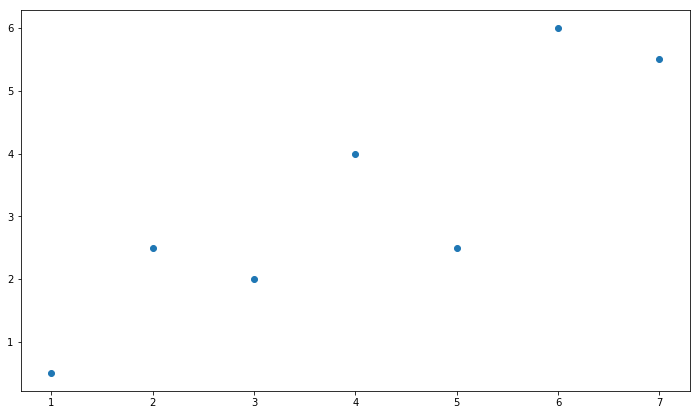

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.scatter([1, 2, 3, 4, 5, 6, 7], [0.5, 2.5, 2, 4, 2.5, 6, 5.5]);

https://github.com/scespinoza/introduction-to-machine-learning

In [3]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [0.5, 2.5, 2, 4, 2.5, 6, 5.5]

In [15]:
def least_squares(x, y):
    
    n = len(x)
    xsum = 0
    ysum = 0
    xsq = 0
    s = 0
    
    for i in range(n):
        
        xsum += x[i]
        ysum += y[i]
        xsq += x[i] ** 2
        s += x[i] * y[i]
    
    print("Sum of x: ", xsum)
    print("Sum of y: ", ysum)
    print("Sum of x ** 2: ", xsq)
    print("Sum of x * y: ", s)
    
    xmean = xsum / n
    ymean = ysum / n
    
    b = (n * s - xsum * ysum) / (n * xsq - xsum ** 2)
    a = ymean - b * xmean
    print('Estimated Function: y = {:.2f} + {:.2f}x'.format(a, b))
    return a, b



a, b = least_squares(x, y)

x0 = 10

y0 = a + b * x0

print(y0)

Sum of x:  28
Sum of y:  23.0
Sum of x ** 2:  140
Sum of x * y:  114.5
Estimated Function: y = 0.07 + 0.80x
8.107142857142858


# Newton - Raphson

$$x_{n + 1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

We need:

 - The function.
 - The derivative.
 - An epsilon.
 - A starting point.

$$f(x) = x^{2} - 4x -7$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

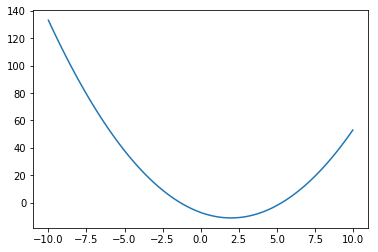

In [19]:
f = lambda x: x ** 2 - 4 * x - 7
df = lambda x: 2 * x - 4

x = np.linspace(-10, 10, 100)
y = f(x)
plt.plot(x, y)


In [27]:
def newton_raphson(f, df, x0, a=100, epsilon=0.01):
    print("epsilon: ", epsilon)
    x = x0
    i = 0
    while abs(f(x)) > epsilon:
        x = x - f(x)/df(x)
        i += 1
        
    print("The method converged to {} in {} iterations. (epsilon = {})".format(x, i, epsilon))
    return x
newton_raphson(f, df, -2000, epsilon=0.0001)

epsilon:  0.0001
The method converged to -1.3166332581527223 in 12 iterations. (epsilon = 0.0001)


-1.3166332581527223

## The Secant Method

$$x_{i + 1} = x_{i} - \frac{f(x_{i - 1})(x_{i - 1} - x_{i}) }{f(x_{i - 1}) - f(x_{i})}$$

$$f(x) = e^{-x} - x$$

$x_{0} = 1$,
$x_{-1} = 0$

Function:


```
def secant_method (f, x0, x_1):
    // your code here
    return x
```

solution: 

x = [0.5, 0.5663110031972182, 0.5671431650348622, 0.5671432904097811, 0.5671432904097811]


et = [100.0, 11.709290976662398, 0.14672870783743905, 2.2106391984397626e-05]

In [30]:
import numpy as np
f = lambda x: np.e ** (-x) - x

def secant_method(f, x0, x_1, epsilon=0.001):
    
    x = x0
    
    while abs(f(x)) > epsilon:
        
        aux = x
        x = x - (f(x_1) * (x_1 - x)) / (f(x_1) - f(x))
        x_1 = aux
        
    return(x)


print(secant_method(f, 1, 0.))
    
    
    
    
    

0.567394560401312


## Pandas

In [31]:
import pandas as pd

Import functions:

```
pd.import_csv()
pd.import_excel()


```

Datasets:

 - Boston Crimes Dataset (ISO-8859-1): crimes.csv
 - Google Reads Books: books.csv
 

In [33]:
boston = pd.read_csv('data/crime.csv', encoding='ISO-8859-1')

In [35]:
boston.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,NaN,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,NaN,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


In [36]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [37]:
boston.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000
